In [69]:
import pandas as pd
from functools import reduce
import matplotlib.pyplot as plt 

In [ ]:
df = pd.read_csv('framingham.csv')

In [3]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [23]:
df.shape

(4238, 16)

In [24]:
for column in df: 
    print('COLUMN: {}'.format(column))
    print('Datatype: {}'.format(df[column].dtype))
    reduce()
    print(df[column].unique())
    print('=======================')

COLUMN: male
Datatype: int64
[1 0]
COLUMN: age
Datatype: int64
[39 46 48 61 43 63 45 52 50 41 38 42 44 47 60 35 36 59 54 37 56 53 49 65
 51 62 40 67 57 66 64 55 58 34 68 33 70 32 69]
COLUMN: education
Datatype: float64
[ 4.  2.  1.  3. nan]
COLUMN: currentSmoker
Datatype: int64
[0 1]
COLUMN: cigsPerDay
Datatype: float64
[ 0. 20. 30. 23. 15.  9. 10.  5. 35. 43.  1. 40.  3.  2. nan 12.  4. 18.
 25. 60. 14. 45.  8. 50. 13. 11.  7.  6. 38. 29. 17. 16. 19. 70.]
COLUMN: BPMeds
Datatype: float64
[ 0.  1. nan]
COLUMN: prevalentStroke
Datatype: int64
[0 1]
COLUMN: prevalentHyp
Datatype: int64
[0 1]
COLUMN: diabetes
Datatype: int64
[0 1]
COLUMN: totChol
Datatype: float64
[195. 250. 245. 225. 285. 228. 205. 313. 260. 254. 247. 294. 332. 226.
 221. 232. 291. 190. 185. 234. 215. 270. 272. 295. 209. 175. 214. 257.
 178. 233. 180. 243. 237.  nan 311. 208. 252. 261. 179. 194. 267. 216.
 240. 266. 255. 220. 235. 212. 223. 300. 302. 248. 200. 189. 258. 202.
 213. 183. 274. 170. 210. 197. 326. 188. 256. 

There is 'nan' in different columns. 

In [31]:
for i in iter(df.columns): print(i)

male
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose
TenYearCHD


Let's focus on the following features: 
- age
- diabetes
- BMI
- glucose

Goal: 
- clean the data

In [44]:
col_interest = ['age','diabetes','BMI','glucose']

def is_na_present(prev_state:bool,current_val:any)->bool: 
    if prev_state==True: 
        return True
    elif pd.isna(current_val)==True: 
        return True
    else: 
        return False
    
def list_na_present(series):
    return reduce(is_na_present,series)

for col in col_interest:
    print('COLUMN: {}'.format(col))
    print('NA present: {} \n'.format(list_na_present(df[col])))

COLUMN: age
NA present: False 

COLUMN: diabetes
NA present: False 

COLUMN: BMI
NA present: True 

COLUMN: glucose
NA present: True 



In [59]:
df_filtered[['BMI','glucose']].isna().sum()

BMI         19
glucose    388
dtype: int64

In [48]:
df_filtered = df[col_interest]
orig_nrow = df_filtered.shape[0]
df_no_na = df_filtered.dropna()
new_nrow = df_no_na.shape[0]
print('{} rows were removed'.format(orig_nrow-new_nrow))

402 rows were removed


In [63]:
df_no_na.shape

(3836, 4)

In [64]:
df_no_na.dtypes

age           int64
diabetes      int64
BMI         float64
glucose     float64
dtype: object

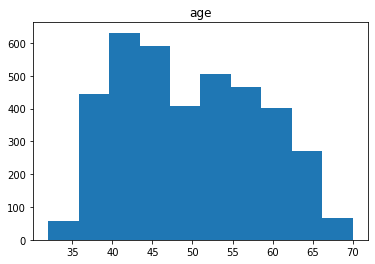

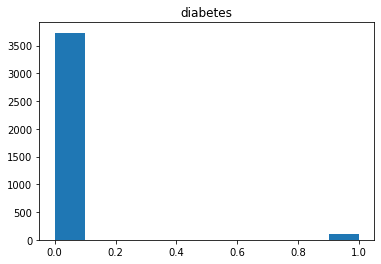

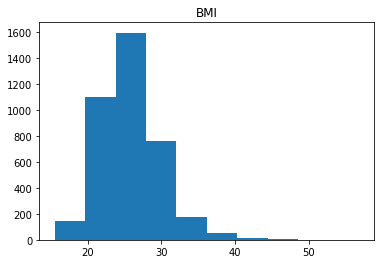

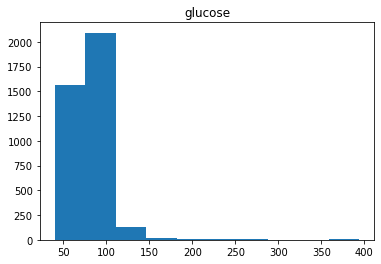

In [72]:
for col in col_interest: 
    fig, ax = plt.subplots()
    ax.hist(df_no_na[col])
    ax.set_title(col)

If you need help understanding the plotting, you can go here: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html

age, diabetes, BMI are showing normal values. Glucose looks like it may have a outlier at 350 to 400 range. 

What is is values of glucose? 

What is the database from? Context.

What is normal ranges of glucose? 

Here is a link to the organisation: https://framinghamheartstudy.org/fhs-about/

wiki: https://en.wikipedia.org/wiki/Framingham_Heart_Study

A study using this dataset gives explanation to these features: 
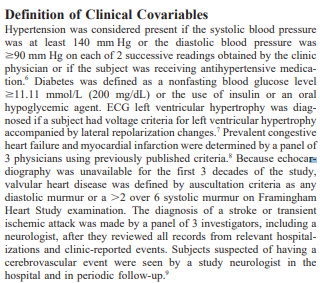

<mark>THOUGHT: does this definition of diabetes match the Pima definition of diabetes?</mark>

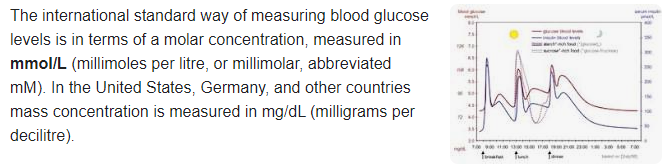

https://en.wikipedia.org/wiki/Blood_sugar_level

Reading wiki on blood sugar level, there seems to be a natural level around 100mg/dL (70 to 130). For diabetic people, they may need to regulate there glucose under 180.

Note there is another standard reading for blood sugar level, but the values are in a order of magnitude different. Therefore, it will be assumed the data set refers to the above units.

reading: https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

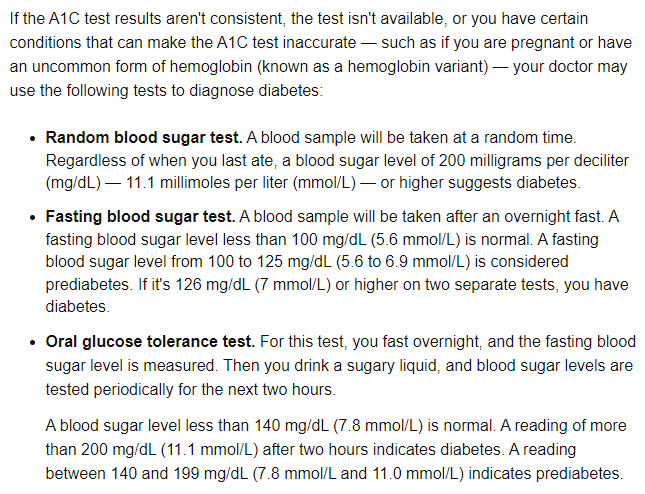

It seems values above 130 are indication of diabetes, broadly.

Reading paper <b>High BLood Sugar (Hyperglycemia)</b> values above 300 are dangerious. Snippet below: 



Reading this gives indication it is possible in the range of values, but is dangerous. i.e. it is not a normal operating sugar level for a diabetic person. 

As the outlier is around 300-400 and is feasible for diabetic person, the value will be kept.

In [78]:
df_no_na[df_no_na.glucose>300]

,age,diabetes,BMI,glucose
1363,55,1,22.24,325.0
2406,62,1,21.34,386.0
2801,47,1,34.91,320.0
2893,62,1,17.17,394.0
2909,67,1,27.86,394.0
3817,47,1,28.50,332.0
3844,62,1,37.62,368.0
3849,46,1,20.84,348.0
3971,64,1,24.90,370.0


In [85]:
print('There are {} samples with readings above 300. \n In terms of percentage, it is {}.% of the total dataset'\
      .format(df_no_na[df_no_na.glucose>300].shape[0],round(df_no_na[df_no_na.glucose>300].shape[0]/df_no_na.shape[0]*100,2)))

There are 9 samples with readings above 300. 
 In terms of percentage, it is 0.23.% of the total dataset


Now that we have afirmed the values for the glucose levels, we can package the values for export. 

To export the dataset into PIMA dataset, we will need to have the data in the following format: 
- age in int
- diabetes in int
- BMI in float
- glucose in int

In [86]:
df_no_na.dtypes

age           int64
diabetes      int64
BMI         float64
glucose     float64
dtype: object

Now lets convert feature names

In [93]:
df_export = df_no_na
df_export = df_export.rename(columns={
    'age':'Age',
    'diabetes':'Outcome',
    'glucose':'Glucose'
})

# re-arrange features to be inline with the Pima dataset order.
df_export = df_export[['Glucose','BMI','Age','Outcome']]

df_export.head(1)

,Glucose,BMI,Age,Outcome
0,77.0,26.97,39,0


In [98]:
df_export.to_csv('framingham_prepared_for_pima.csv', index=False)
print('Exported')

Exported
